In [1]:
import os
import pandas as pd
from activity_count_function import *
from group_analysis_functions import *
from individual_analysis_ac_functions import *
from utilities import *
from individual_analysis_fs_functions import *
from gm_function import *

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#CHANGE VALUE HERE#
# H for Healthy and S for Stroke 
participant_group = 'H'
# Testing participant can be cross group (e.g., testing H parameters with S dataset)
testing_participant_id = 'S002' 

In [3]:
# PATHS
initial_path = '../CreateStudy'
figures_path = '../CreateStudy/group_figures'

# CONSTANTS
threshold_labels = ['CT', 'OT']
side_labels = ['ndh', 'DH', 'bilateral']
metric_labels = ['Sensitivity', 'Specificity', 'Accuracy']
metric_names_to_plot = ['Sensitivity', 'Specificity', 'Accuracy', 'PPV', 'NPV']

# Constants related to thresholds
conventional_functional_space = 30
conventional_threshold_unilateral = 2  # Bailey and Lang, 2013
conventional_threshold_bilateral = 0  # Bailey and Lang, 2013

# Constants related to metric frequencies
frequency_GT = 50  # Hz
frequency_gm = 2   # Hz
frequency_gmac = 1  # Hz

# FILES TO GET FOR EACH PARTICIPANT
# Note: participant_group should be defined somewhere in your code.
csv_file_names = [
    f'{participant_group}_optimal_threshold_AC.csv',
    f'{participant_group}_optimal_threshold_GM.csv',
    'evaluation_metrics_AC.csv',
    'evaluation_metrics_GM.csv',
    'evaluation_metrics_GMAC.csv'
]

In [4]:
# Get testing data from a testing participant, not used in training (hold-out strategy)
(testing_count_brond_ndh, testing_count_brond_dh,
            testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
            testing_pitch_mad_ndh, testing_yaw_mad_ndh, testing_pitch_mad_dh, testing_yaw_mad_dh,
            testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz,
            testing_GT_mask_2Hz_ndh, testing_GT_mask_2Hz_dh, testing_GT_mask_2Hz_bil) = get_testing_data(initial_path, testing_participant_id, frequency_GT, frequency_gm)

In [5]:
# Create a dict for the GT mask 
testing_GT_mask_1Hz = {
    'ndh': testing_GT_mask_ndh_1Hz,
    'dh': testing_GT_mask_dh_1Hz,
    'bil': testing_GT_mask_bil_1Hz
}

testing_GT_mask_50Hz = {
    'ndh': testing_GT_mask_50Hz_ndh,
    'dh': testing_GT_mask_50Hz_dh,
    'bil': testing_GT_mask_bil_50Hz
}

In [6]:
testing_GT_mask_50Hz_ndh.shape

(41570,)

In [7]:
# Analysis across individuals #

In [8]:
# Get the csv file paths for all participants because it is an individual comparaison
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)

In [9]:
csv_files_dict

{'S_optimal_threshold_AC.csv': ['../CreateStudy\\S002\\S_optimal_threshold_AC.csv',
  '../CreateStudy\\S003\\S_optimal_threshold_AC.csv',
  '../CreateStudy\\S004\\S_optimal_threshold_AC.csv'],
 'S_optimal_threshold_GM.csv': ['../CreateStudy\\S002\\S_optimal_threshold_GM.csv',
  '../CreateStudy\\S003\\S_optimal_threshold_GM.csv',
  '../CreateStudy\\S004\\S_optimal_threshold_GM.csv'],
 'evaluation_metrics_AC.csv': ['../CreateStudy\\S002\\evaluation_metrics_AC.csv',
  '../CreateStudy\\S003\\evaluation_metrics_AC.csv',
  '../CreateStudy\\S004\\evaluation_metrics_AC.csv'],
 'evaluation_metrics_GM.csv': ['../CreateStudy\\S002\\evaluation_metrics_GM.csv',
  '../CreateStudy\\S003\\evaluation_metrics_GM.csv',
  '../CreateStudy\\S004\\evaluation_metrics_GM.csv'],
 'evaluation_metrics_GMAC.csv': ['../CreateStudy\\S002\\evaluation_metrics_GMAC.csv',
  '../CreateStudy\\S003\\evaluation_metrics_GMAC.csv',
  '../CreateStudy\\S004\\evaluation_metrics_GMAC.csv']}

In [10]:
csv_file_names = [
    f'{participant_group}_optimal_threshold_AC.csv',
    f'{participant_group}_optimal_threshold_GM.csv',
    'evaluation_metrics_AC.csv',
    'evaluation_metrics_GM.csv',
    'evaluation_metrics_GMAC.csv'
]

# Access individual values per participant
optimal_threshold_AC_path = csv_files_dict[f'{participant_group}_optimal_threshold_AC.csv']
optimal_threshold_GM_path = csv_files_dict[f'{participant_group}_optimal_threshold_GM.csv']
evaluation_metrics_AC_path = csv_files_dict['evaluation_metrics_AC.csv']
evaluation_metrics_GM_path = csv_files_dict['evaluation_metrics_GM.csv']
evaluation_metrics_GMAC_path = csv_files_dict['evaluation_metrics_GMAC.csv']

# Get the optimal thresholds from the csv file paths 
group_optimal_threshold_AC = extract_data_from_csv(optimal_threshold_AC_path)
group_optimal_threshold_GM = extract_data_from_csv(optimal_threshold_GM_path)

# Split ndh and dh 
group_optimal_threshold_AC_ndh, group_optimal_threshold_AC_dh = group_optimal_threshold_AC
group_optimal_threshold_GM_ndh, group_optimal_threshold_GM_dh = group_optimal_threshold_GM

# Get the evaluation metrics for each participant 
group_evaluation_metrics_AC = regroup_field_data_metrics(evaluation_metrics_AC_path)
group_evaluation_metrics_GM = regroup_field_data_metrics(evaluation_metrics_GM_path)
group_evaluation_metrics_GMAC = regroup_field_data_metrics(evaluation_metrics_GMAC_path)

In [11]:
## AC Indiviudal comparison ## 

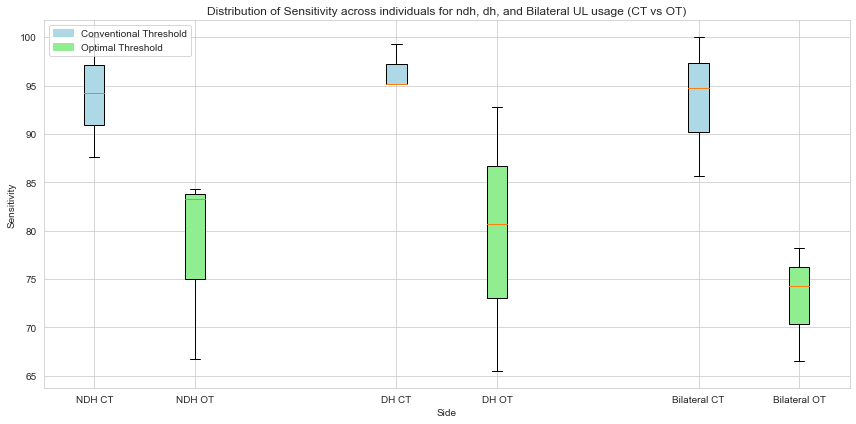

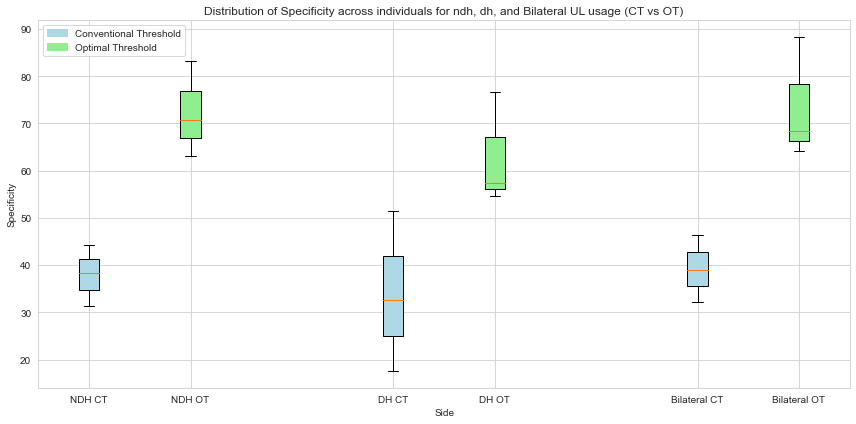

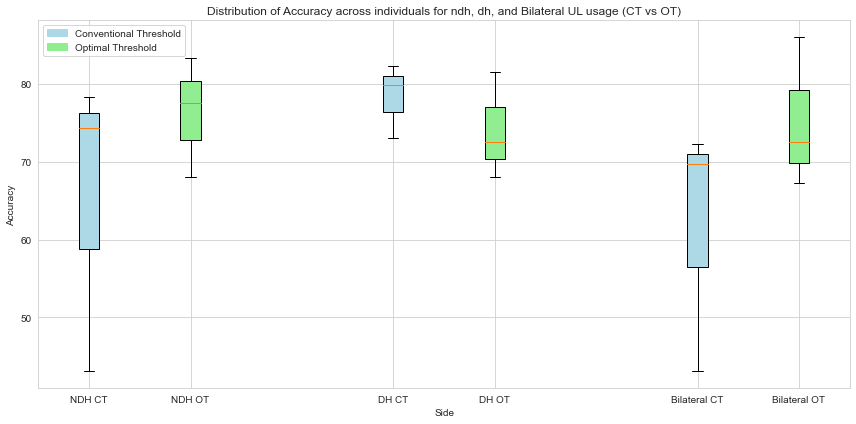

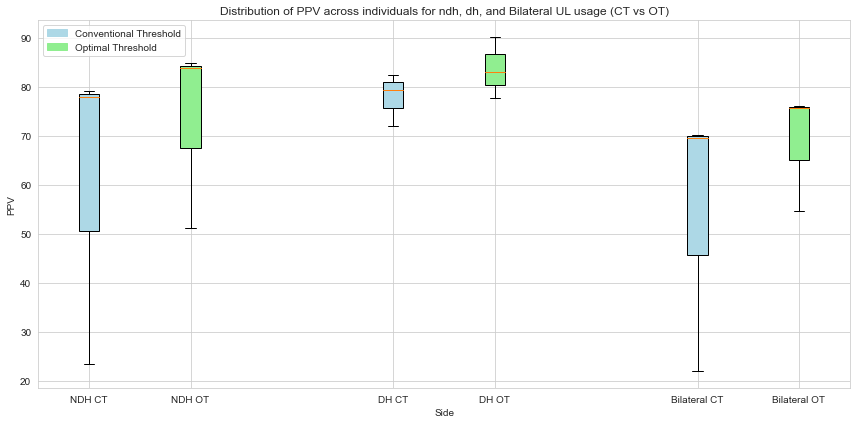

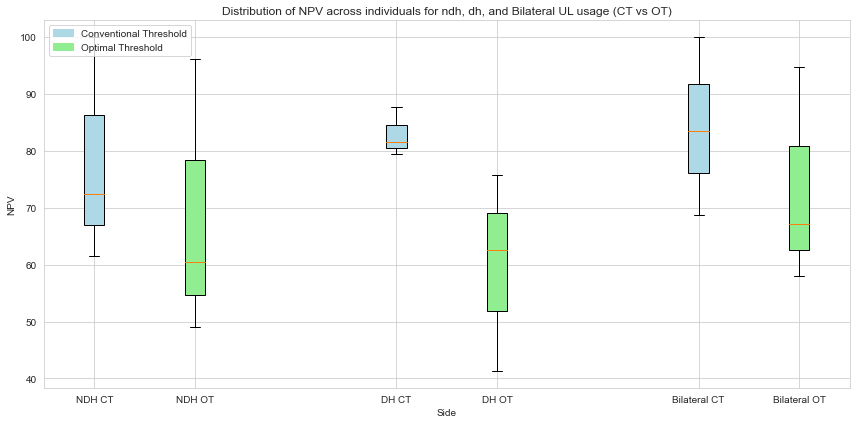

In [12]:
plot_side_metrics(group_evaluation_metrics_AC, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.
# A high PPV positive predictive value indicates that when the model predicts a positive outcome, it's likely to be correct. 
# A high NPV indicates that when the model predicts a negative outcome, it's likely to be correct.

In [13]:
## GM ## 

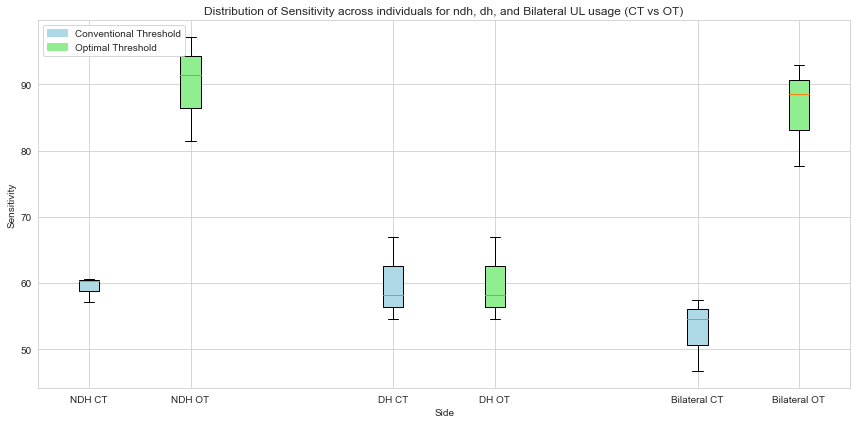

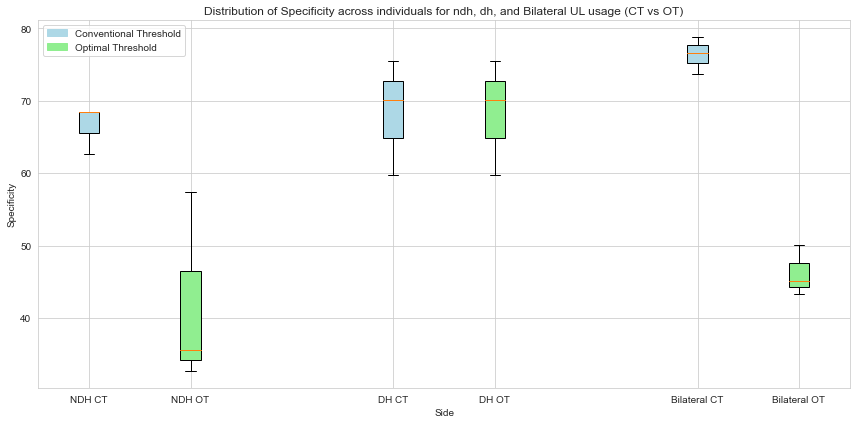

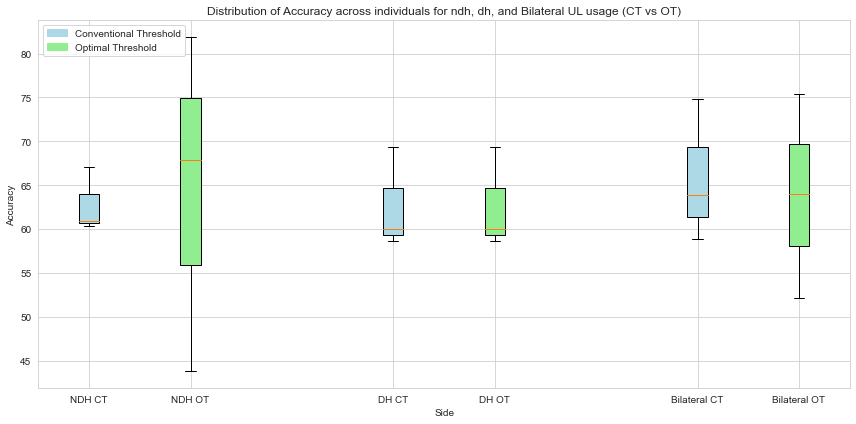

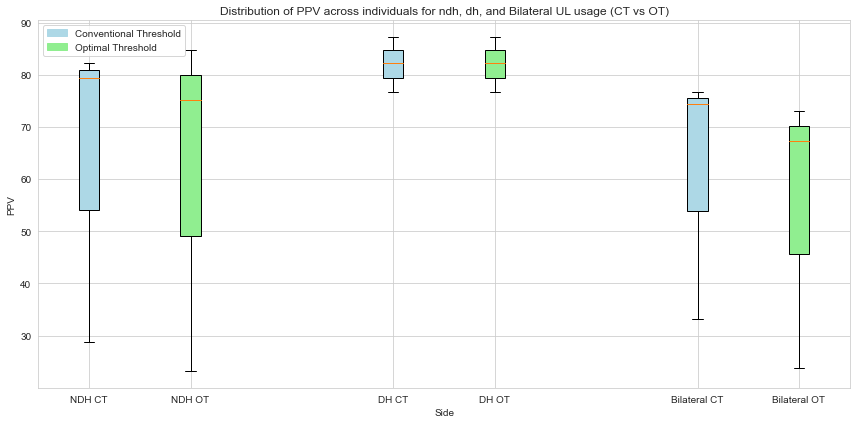

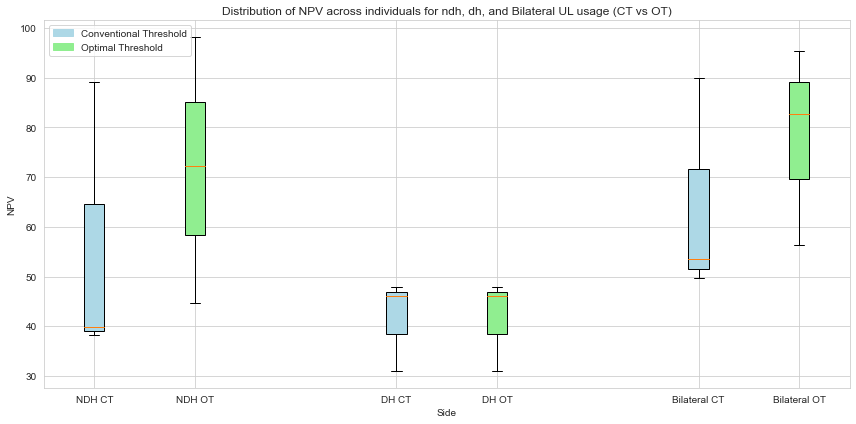

In [14]:
plot_side_metrics(group_evaluation_metrics_GM, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.

In [15]:
# GMAC # 

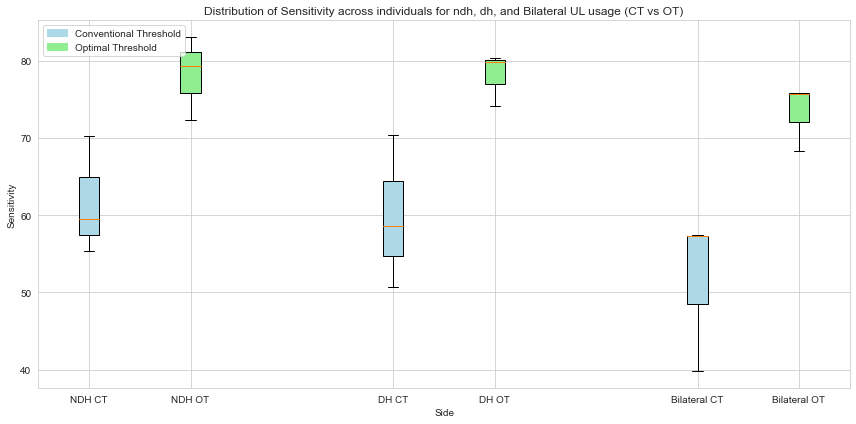

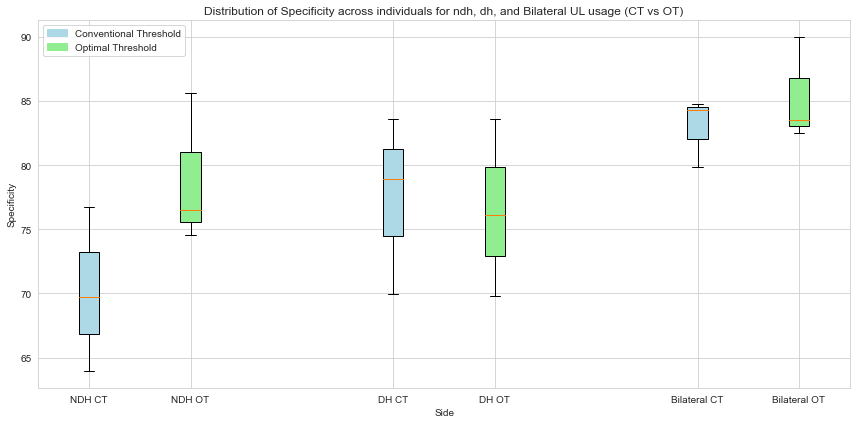

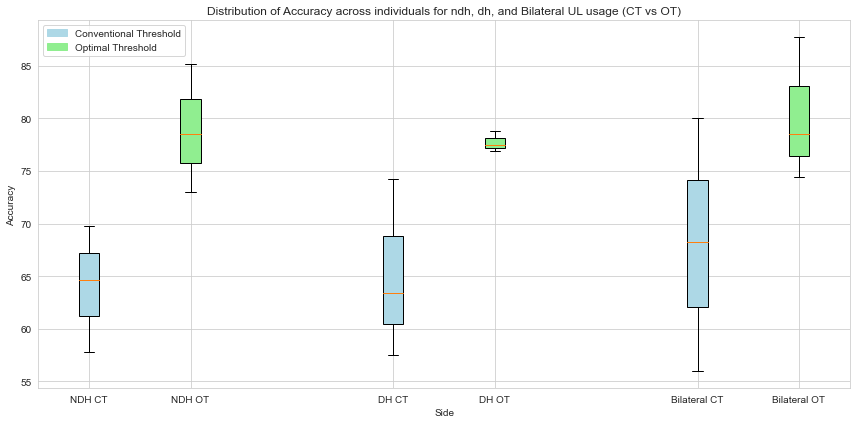

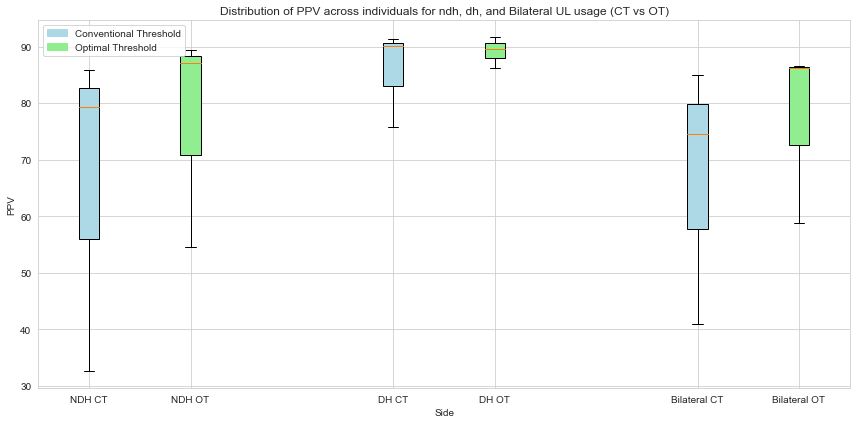

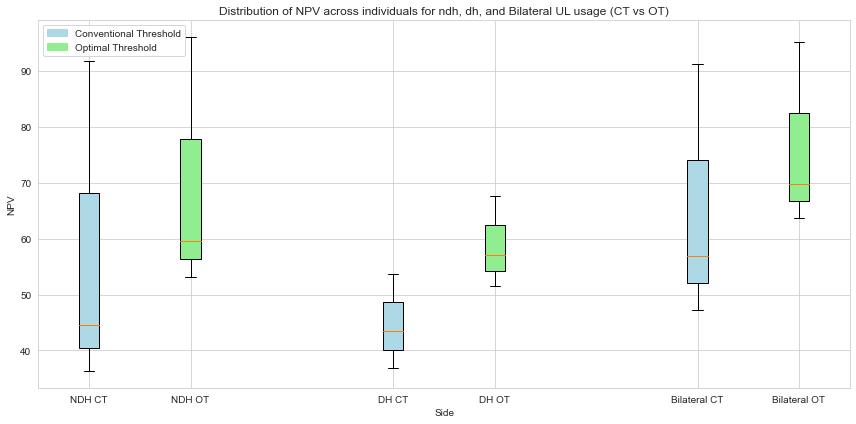

In [16]:
plot_side_metrics(group_evaluation_metrics_GMAC, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.

In [17]:
## Group Analysis: using training and testing dataset to compute a unique value for AC and GM optimal parameters ##

In [18]:
## AC Optimal Parameters ##

In [19]:
# PATH for AC # 
group_csv_file_names_ac = ['count_brond_ndh.csv', 'count_brond_dh.csv', 'GT_mask_ndh_1Hz.csv', 'GT_mask_dh_1Hz.csv']

In [20]:
# Get the  csv files for each participant and EXCLUDE the testing participant  
group_csv_files_dict_ac = find_specific_csv_files(initial_path, group_csv_file_names_ac, participant_group, testing_participant = testing_participant_id)

count_brond_ndh_paths =  group_csv_files_dict_ac['count_brond_ndh.csv']
count_brond_dh_paths = group_csv_files_dict_ac['count_brond_dh.csv']
GT_mask_ndh_1Hz_paths = group_csv_files_dict_ac['GT_mask_ndh_1Hz.csv']
GT_mask_dh_1Hz_paths = group_csv_files_dict_ac['GT_mask_dh_1Hz.csv']

In [21]:
group_csv_files_dict_ac

{'count_brond_ndh.csv': ['../CreateStudy\\S002\\count_brond_ndh.csv',
  '../CreateStudy\\S003\\count_brond_ndh.csv',
  '../CreateStudy\\S004\\count_brond_ndh.csv'],
 'count_brond_dh.csv': ['../CreateStudy\\S002\\count_brond_dh.csv',
  '../CreateStudy\\S003\\count_brond_dh.csv',
  '../CreateStudy\\S004\\count_brond_dh.csv'],
 'GT_mask_ndh_1Hz.csv': ['../CreateStudy\\S002\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\S003\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\S004\\GT_mask_ndh_1Hz.csv'],
 'GT_mask_dh_1Hz.csv': ['../CreateStudy\\S002\\GT_mask_dh_1Hz.csv',
  '../CreateStudy\\S003\\GT_mask_dh_1Hz.csv',
  '../CreateStudy\\S004\\GT_mask_dh_1Hz.csv']}

(1234,)
(1401,)
(1120,)


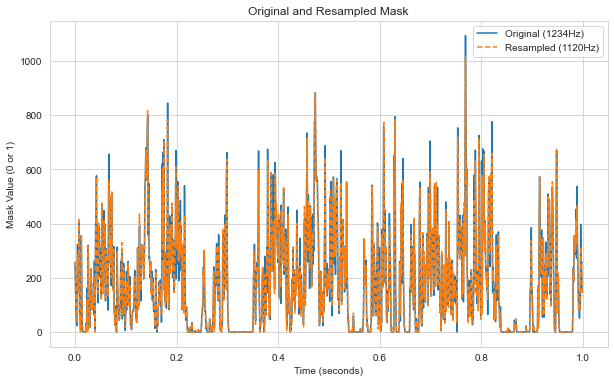

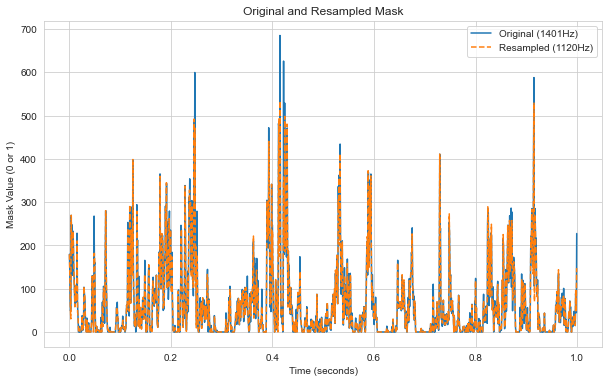

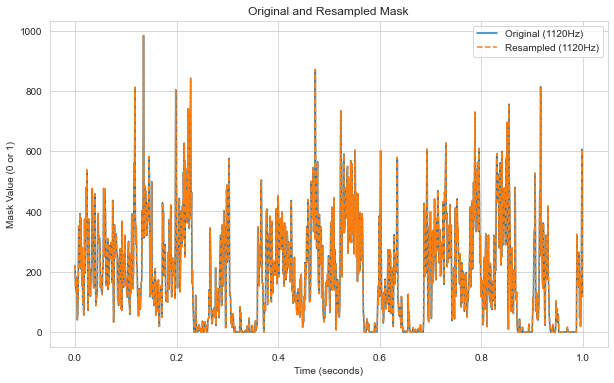

Elements removed in array 1: 114
Elements removed in array 2: 281
Elements removed in array 3: 0
(1234,)
(1401,)
(1120,)


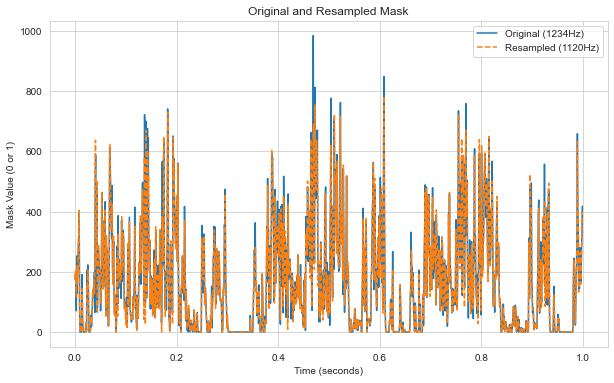

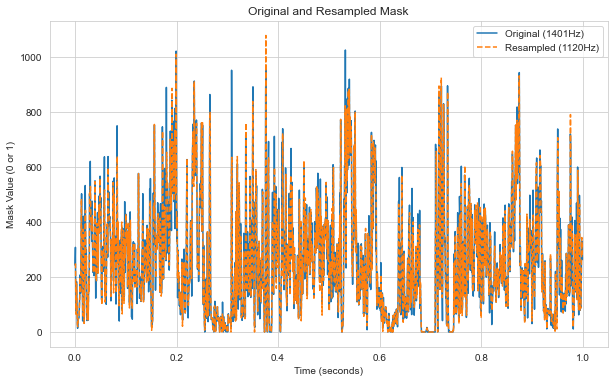

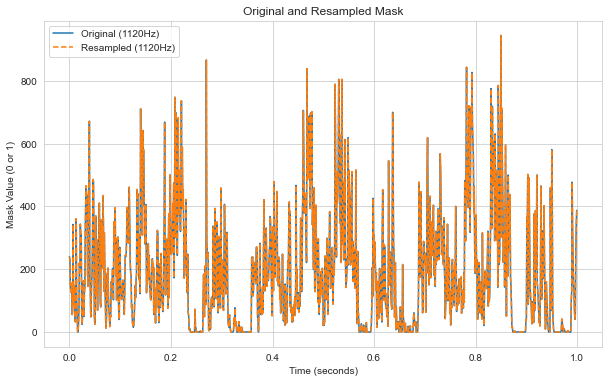

Elements removed in array 1: 114
Elements removed in array 2: 281
Elements removed in array 3: 0
(1234,)
(1401,)
(1120,)


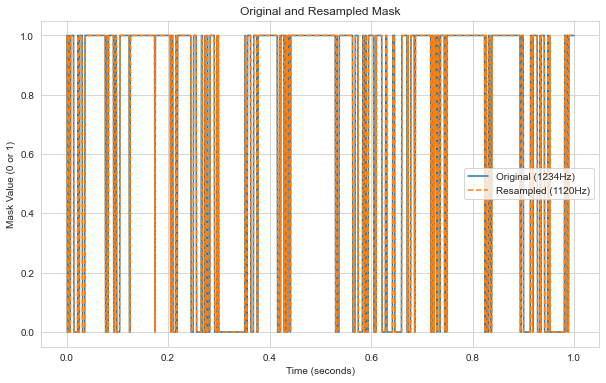

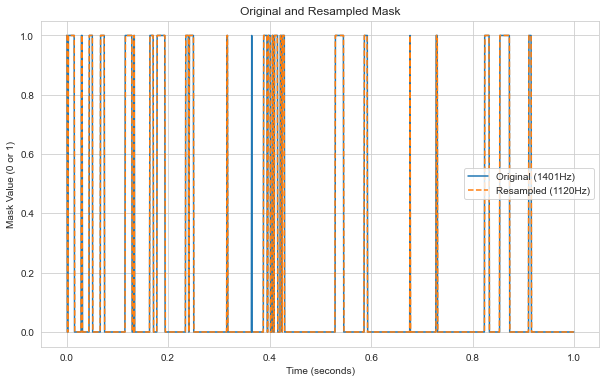

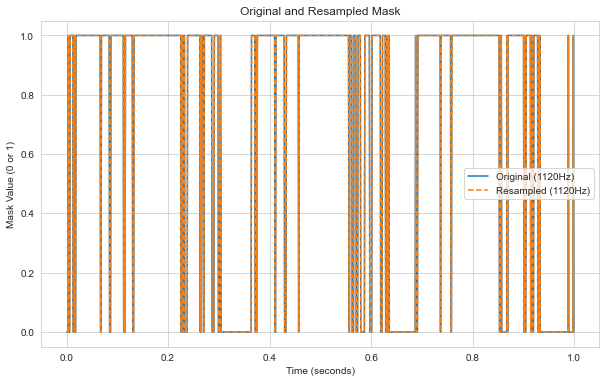

Elements removed in array 1: 114
Elements removed in array 2: 281
Elements removed in array 3: 0
(1234,)
(1401,)
(1120,)


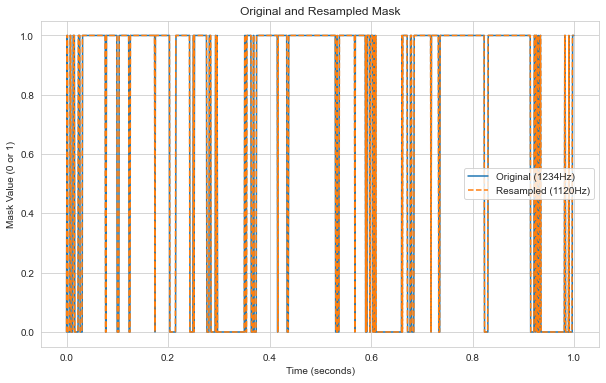

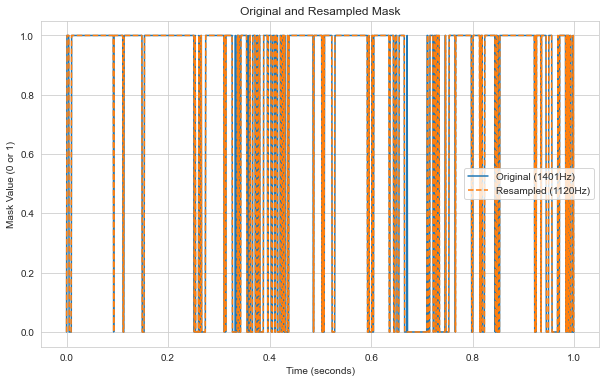

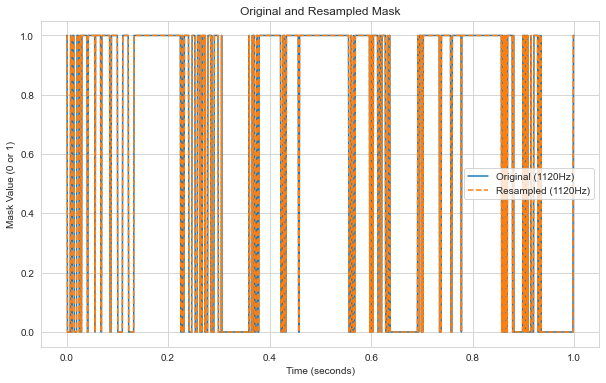

Elements removed in array 1: 114
Elements removed in array 2: 281
Elements removed in array 3: 0


In [22]:
# Compute the group dataset, downsampling to the smallest participant dataset
group_count_brond_ndh = get_group_dataset_from_csv(count_brond_ndh_paths, mask=False)
group_count_brond_dh = get_group_dataset_from_csv(count_brond_dh_paths, mask=False)
group_GT_mask_ndh_1Hz = get_group_dataset_from_csv(GT_mask_ndh_1Hz_paths, mask=True)
group_GT_mask_dh_1Hz = get_group_dataset_from_csv(GT_mask_dh_1Hz_paths, mask=True)

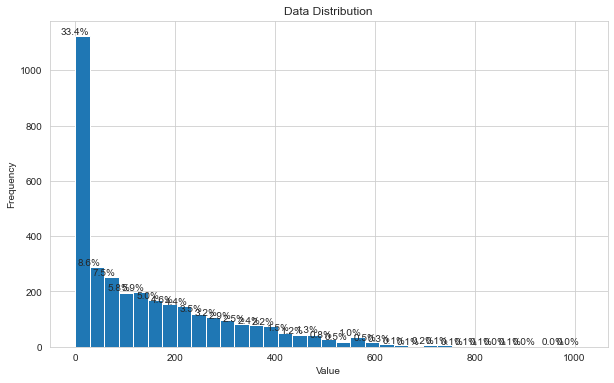

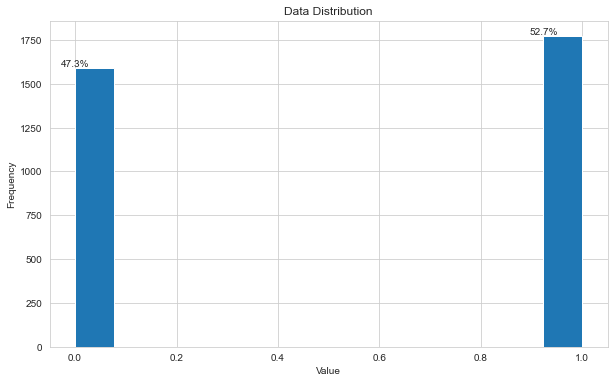

({'mean': 145.3828882934395,
  'median': 88.08543803393879,
  'iqr': 222.10761413400542,
  'range': 1015.4689705081337,
  'std': 162.15777896418982,
  'max': 1015.4689705081337,
  'min': 0.0,
  'num_elements': 3360},
 {'mean': 0.5270833333333333,
  'median': 1.0,
  'iqr': 1.0,
  'range': 1,
  'std': 0.4992659542323665,
  'max': 1,
  'min': 0,
  'num_elements': 3360})

In [23]:
get_statistics(group_count_brond_ndh), get_statistics(group_GT_mask_ndh_1Hz), 

In [24]:
# Get group optimal AC thresholds 
group_optimal_ac_threshold_ndh = optimal_group_ac_threshold_computation(group_count_brond_ndh, group_GT_mask_ndh_1Hz)
group_optimal_ac_threshold_dh = optimal_group_ac_threshold_computation(group_count_brond_dh, group_GT_mask_dh_1Hz)
# Save  the group optimal AC threshold values  
print(group_optimal_ac_threshold_ndh, group_optimal_ac_threshold_dh)
save_optimal_threshold(initial_path, group_optimal_ac_threshold_ndh, group_optimal_ac_threshold_dh, AC = True, group = participant_group)

AUC: 0.8234287533682833
Optimal Threshold: 85.68
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
AUC: 0.7780855116957133
Optimal Threshold: 132.68
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
85.68 132.68
Thresholds saved successfully at: ../CreateStudy\S_optimal_threshold_AC.csv


In [25]:
## GM Optial parameters ## 

In [26]:
# PATH # 
csv_file_name_gm = ['gm_datasets.csv']

# Get the  csv file paths for each participant minus the testing participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_name_gm, participant_group, testing_participant = testing_participant_id)

In [27]:
# Ensure we are letting one participant aside for testing
csv_files_dict

{'gm_datasets.csv': ['../CreateStudy\\S002\\gm_datasets.csv',
  '../CreateStudy\\S003\\gm_datasets.csv',
  '../CreateStudy\\S004\\gm_datasets.csv']}

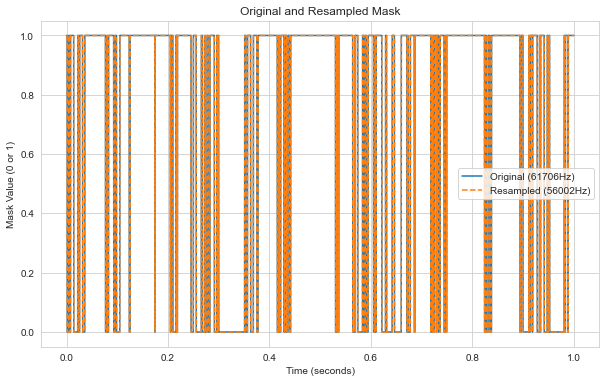

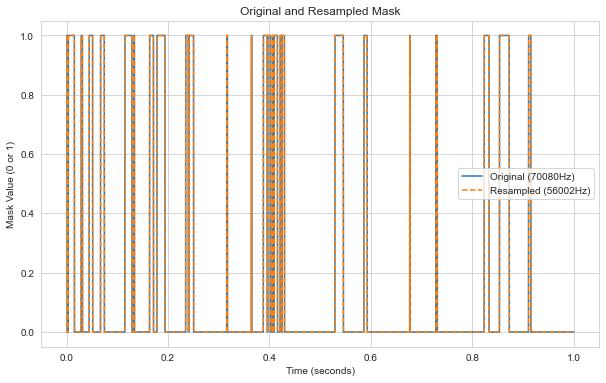

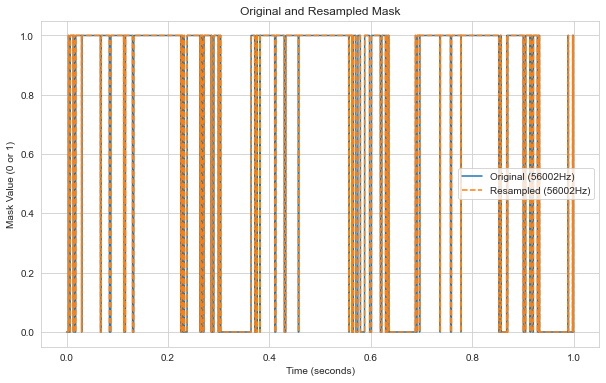

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


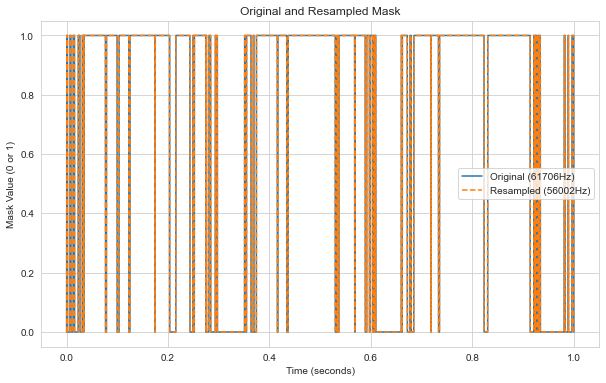

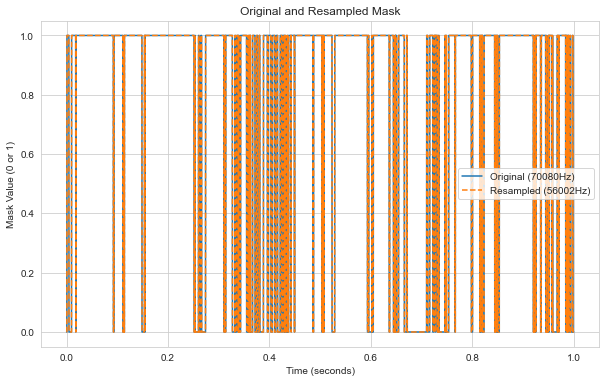

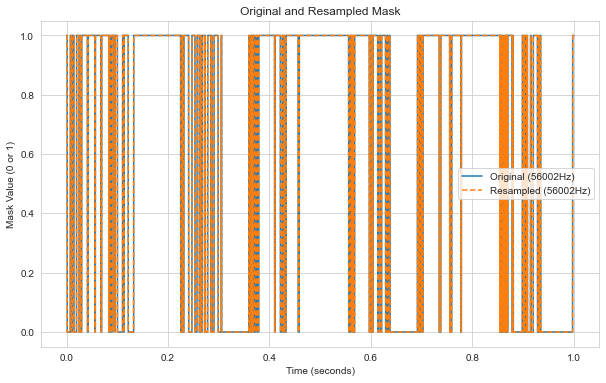

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


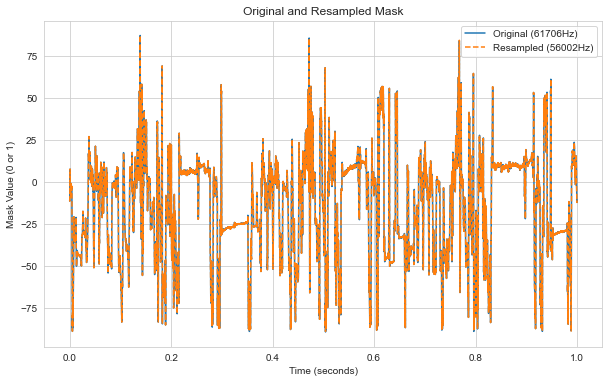

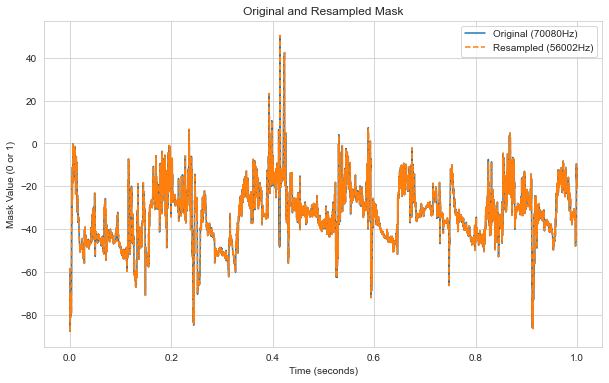

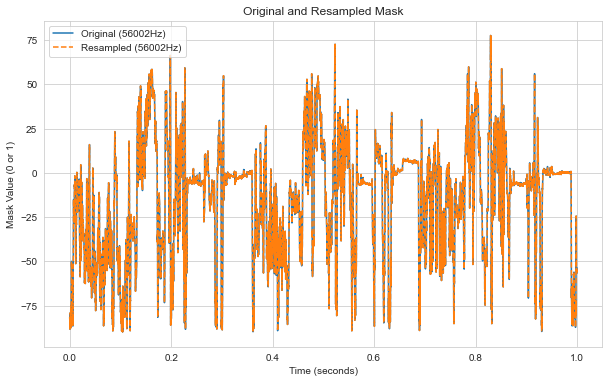

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


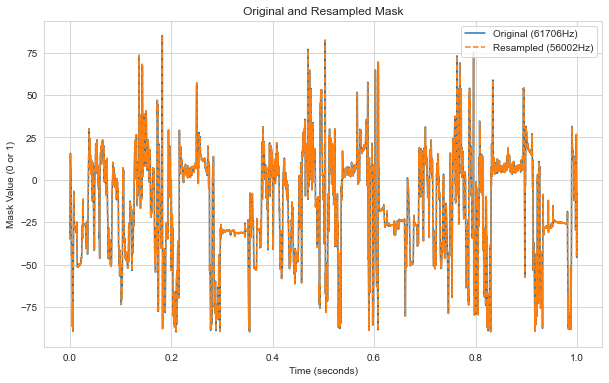

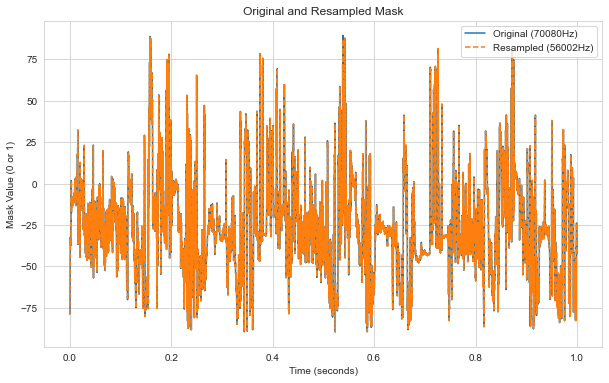

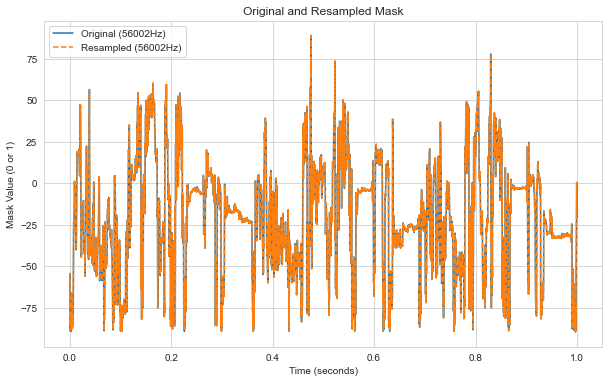

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


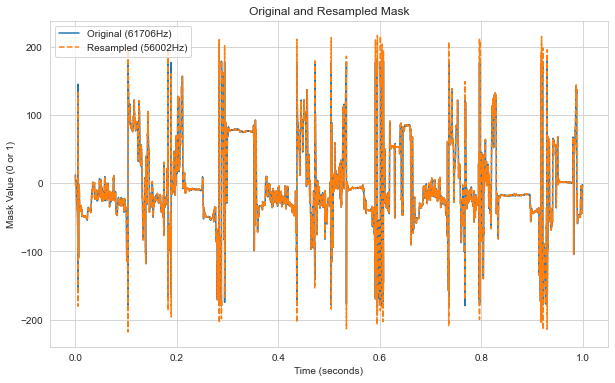

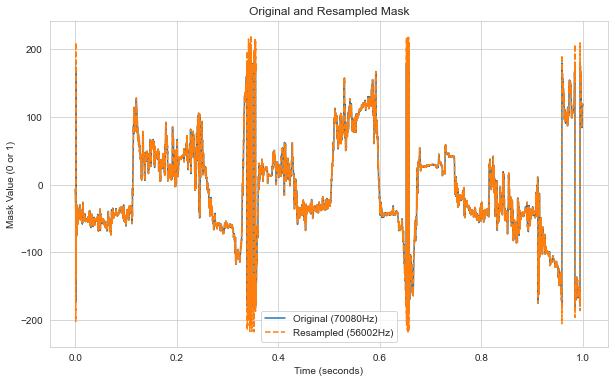

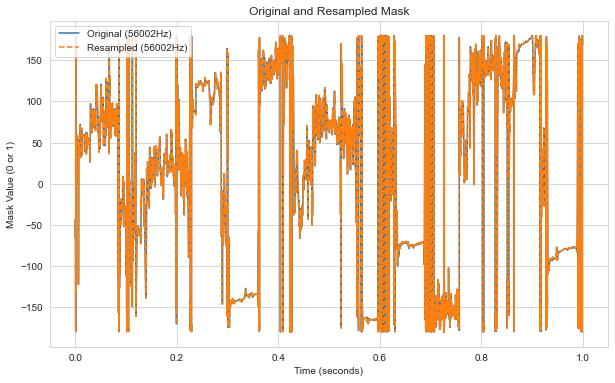

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


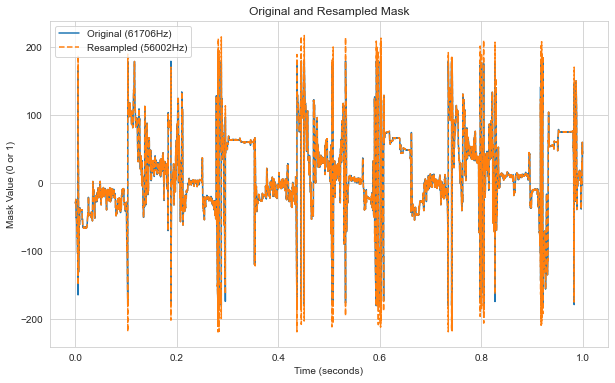

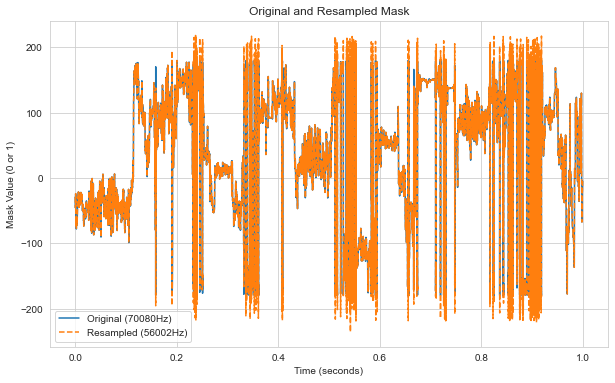

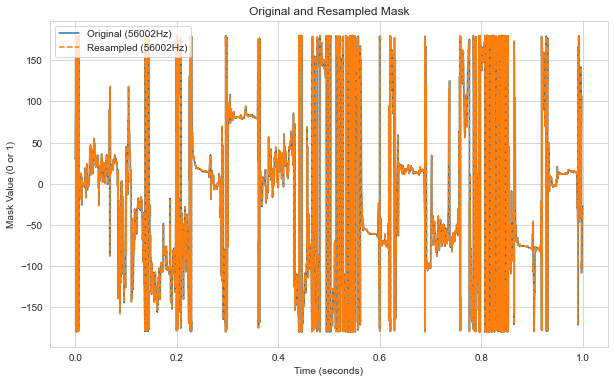

Elements removed in array 1: 5704
Elements removed in array 2: 14078
Elements removed in array 3: 0


In [28]:
# Extract group datasets 
pitch_mad_ndh, yaw_mad_ndh, pitch_mad_dh, yaw_mad_dh, GT_mask_50Hz_ndh, GT_mask_50Hz_dh = get_group_data_gm(csv_files_dict)
group_GT_mask_50Hz_ndh = merge_group_data_gm(GT_mask_50Hz_ndh)
group_GT_mask_50Hz_dh = merge_group_data_gm(GT_mask_50Hz_dh)
group_pitch_mad_ndh = merge_group_data_gm(pitch_mad_ndh, mask = False)
group_pitch_mad_dh = merge_group_data_gm(pitch_mad_dh, mask = False)
group_yaw_mad_ndh = merge_group_data_gm(yaw_mad_ndh, mask = False)
group_yaw_mad_dh = merge_group_data_gm(yaw_mad_dh, mask = False)

In [29]:
# Compute otpimal FS using training data  
# Since the testing is done with a testing participant, no need to use k-fold, training done on the entire merged dataset
# This is called a hold-out validation approach
# Optimal FS NDH
group_optimal_fs_ndh = optimal_group_fs_computation(group_pitch_mad_ndh, group_yaw_mad_ndh, group_GT_mask_50Hz_ndh, optimal=True)
# Optimal FS DH
group_optimal_fs_dh = optimal_group_fs_computation(group_pitch_mad_dh, group_yaw_mad_dh, group_GT_mask_50Hz_dh, optimal=True)
# Save  the group optimal FS values  
print(group_optimal_fs_ndh, group_optimal_fs_dh)
save_optimal_threshold(initial_path, group_optimal_fs_ndh, group_optimal_fs_dh, AC = False, group = participant_group)

75 53
Thresholds saved successfully at: ../CreateStudy\S_optimal_threshold_GM.csv


In [35]:
# Individual plots with optimal parameters per group and accross individual # 

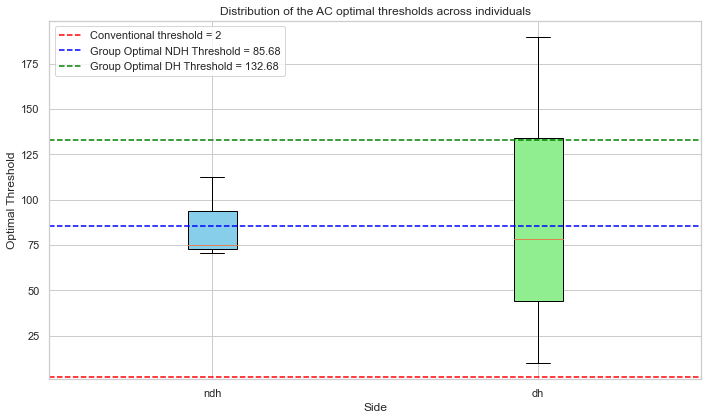

Average ndh: 85.90
Average dh: 92.64
Median ndh: 74.76
Median dh: 78.44


In [36]:
plot_side_by_side_boxplots(group_optimal_threshold_AC_ndh, group_optimal_threshold_AC_dh,
                           group_optimal_ac_threshold_ndh, group_optimal_ac_threshold_dh,
                          metric = 'AC')

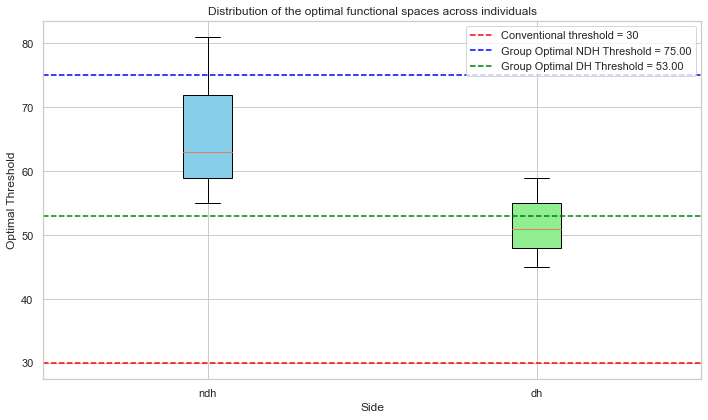

Average ndh: 66.33
Average dh: 51.67
Median ndh: 63.00
Median dh: 51.00


In [37]:
plot_side_by_side_boxplots(group_optimal_threshold_GM_ndh, group_optimal_threshold_GM_dh,
                           group_optimal_fs_ndh, group_optimal_fs_dh,
                           metric = 'GM')

In [30]:
# Testing using testing dataset (unseen data) #

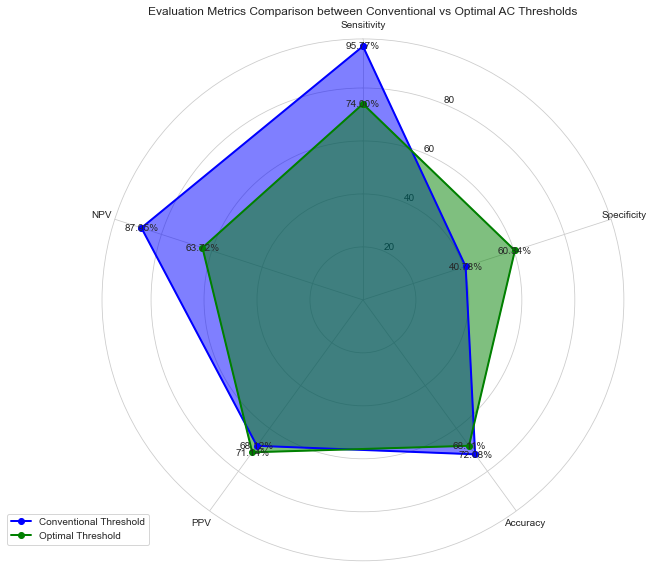

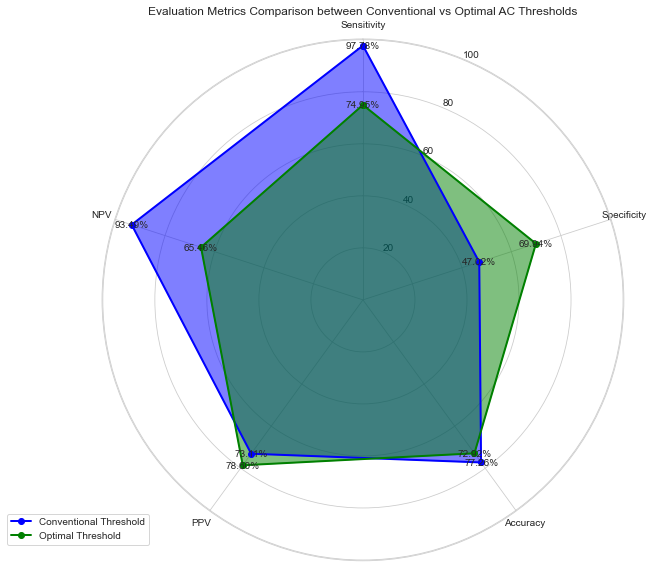

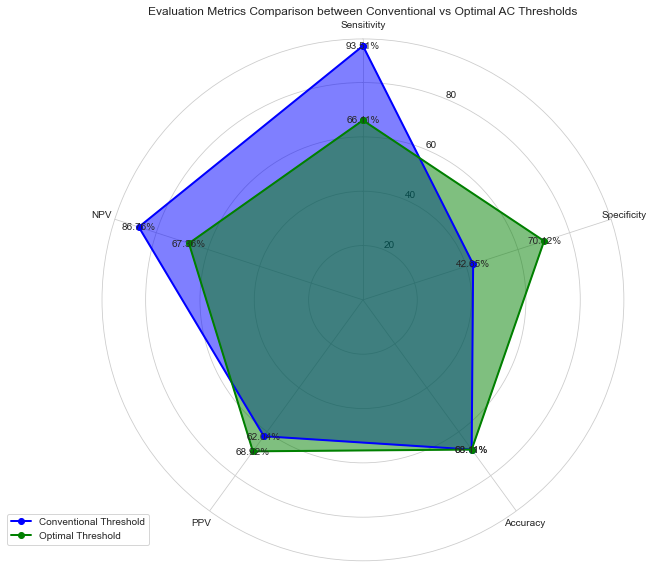

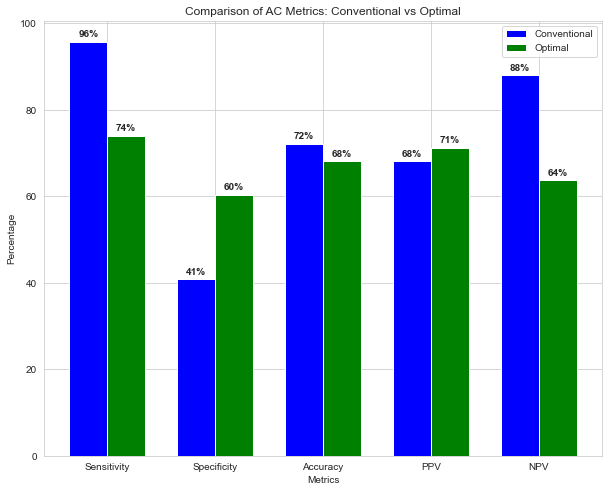

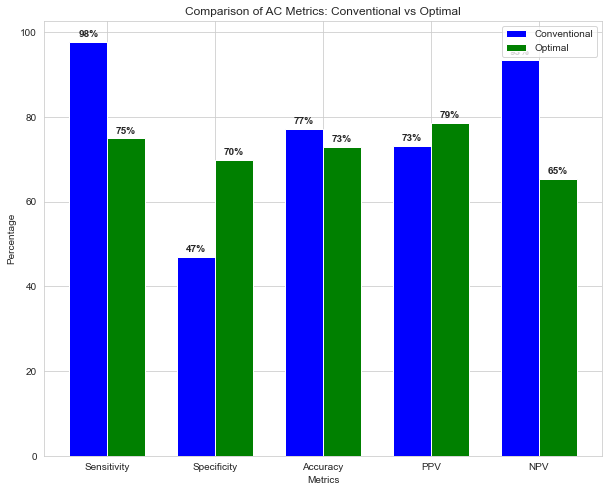

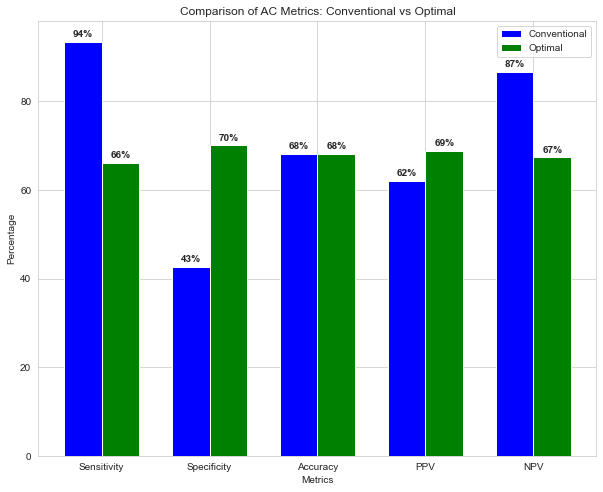

In [31]:
# Test new optimal AC Threshold values on unseen data using the testing participant 
ac_scores, evaluation_metrics_ac = compute_evaluation_metrics_ac(testing_count_brond_ndh, testing_count_brond_dh,
                                testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                conventional_threshold_unilateral, group_optimal_ac_threshold_ndh, group_optimal_ac_threshold_dh)
plot_multiple_radar_plot(evaluation_metrics_ac, figures_path, metric = 'AC')

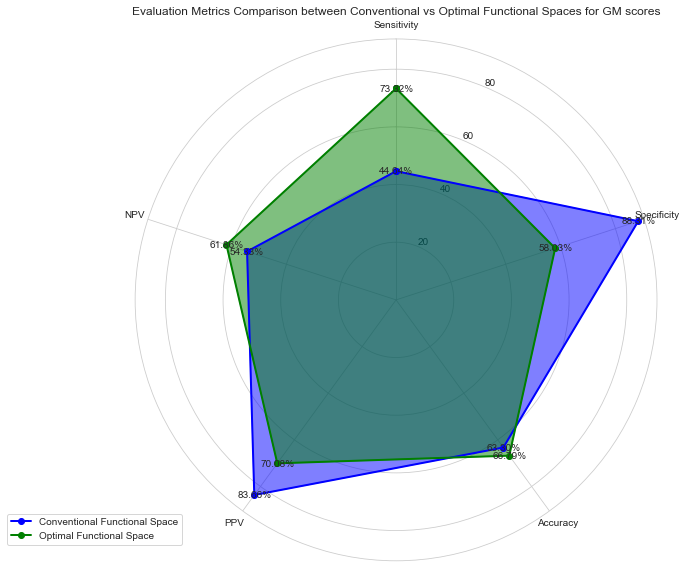

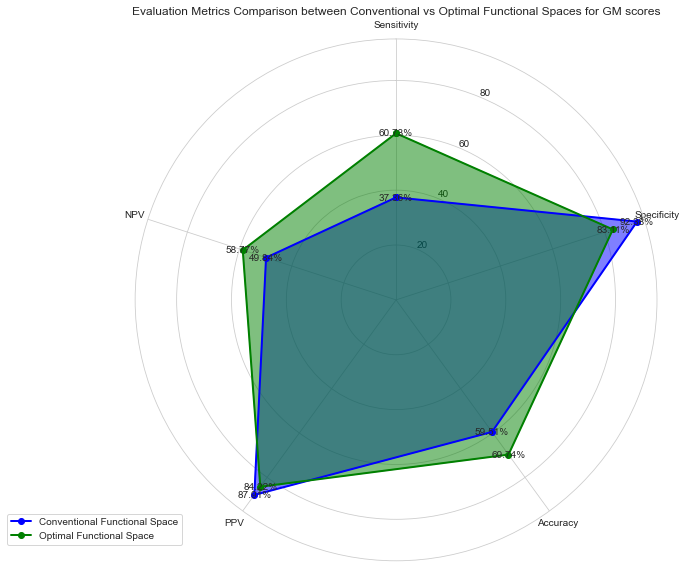

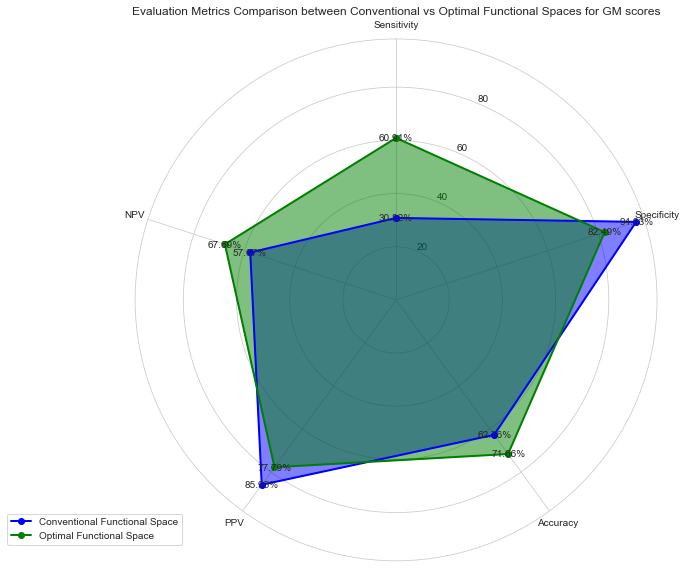

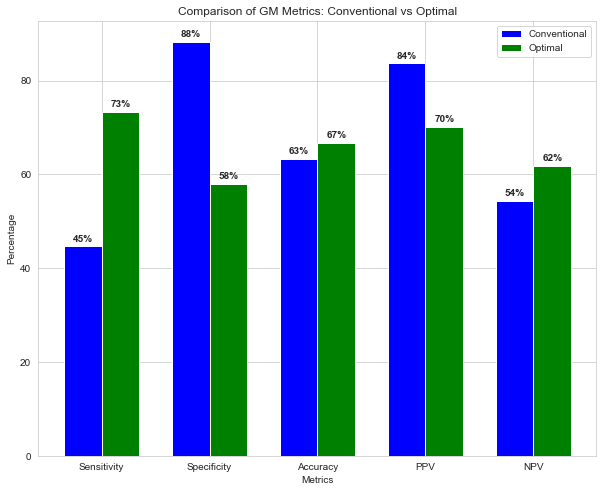

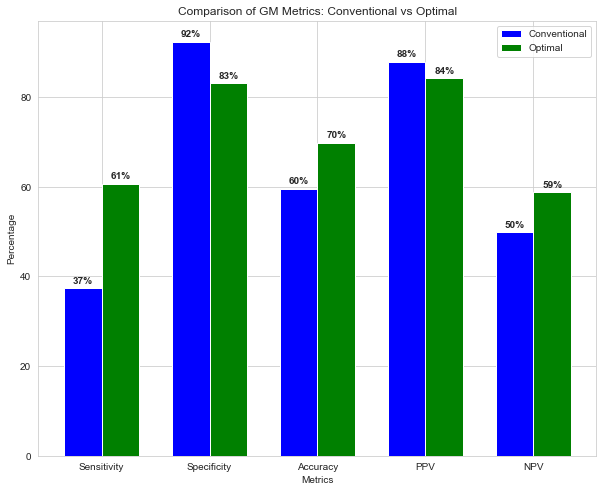

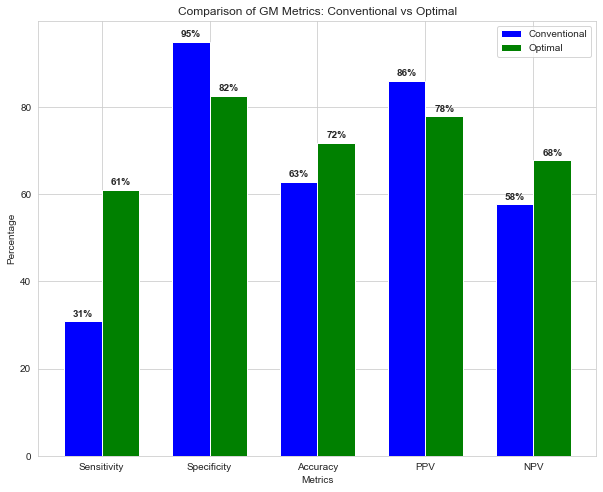

In [32]:
# Test new optimal FS values on unseen data using the testing participant 
gm_scores, eval_metric_gm = compute_evaluation_metrics_gm(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                  testing_yaw_mad_ndh, testing_yaw_mad_dh,
                                  testing_GT_mask_2Hz_ndh, testing_GT_mask_2Hz_dh, testing_GT_mask_2Hz_bil,
                                  conventional_functional_space, group_optimal_fs_ndh, group_optimal_fs_dh)

# Plot difference between convenitonal and optimal FS for the GM algorithm
plot_multiple_radar_plot(eval_metric_gm, figures_path, metric = 'GM')

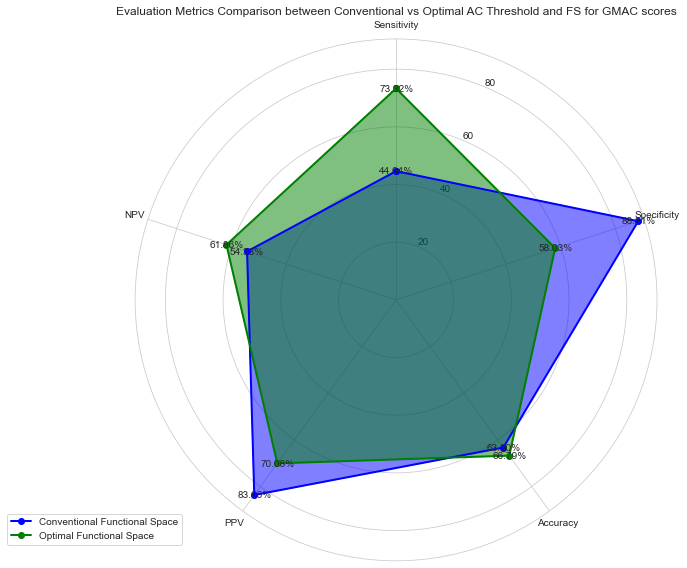

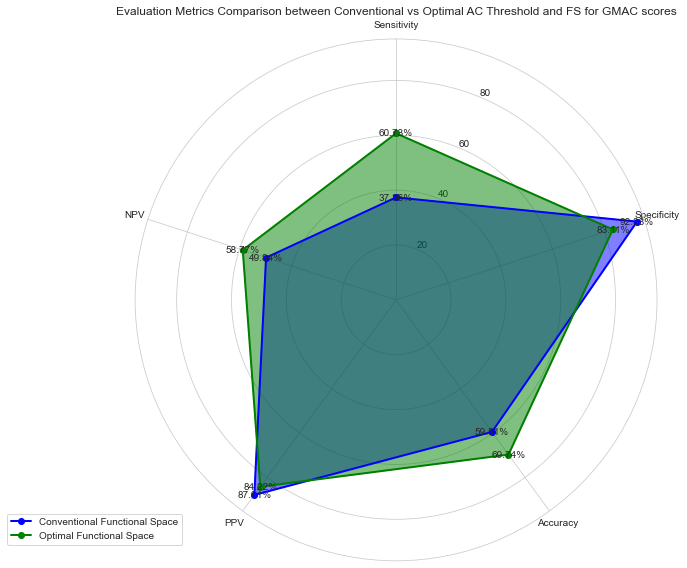

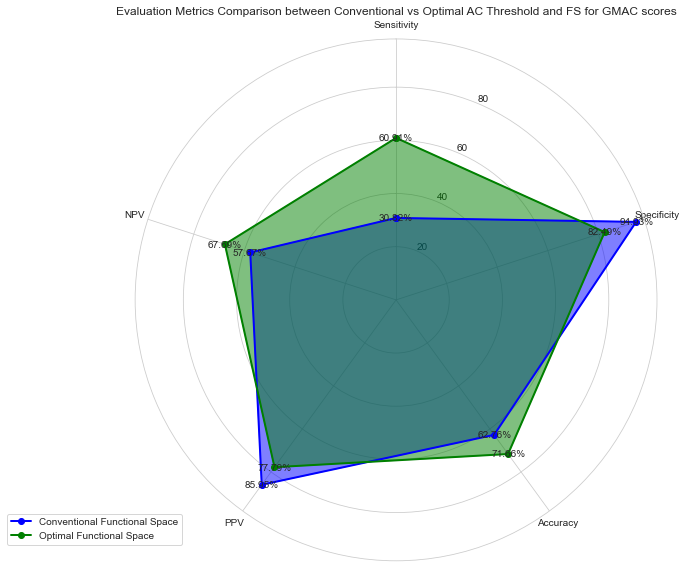

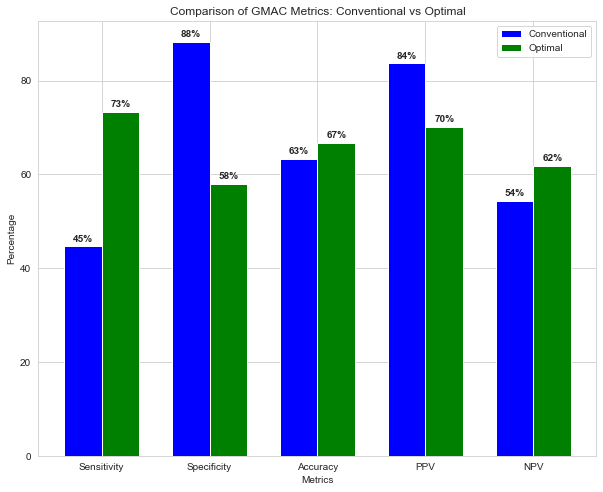

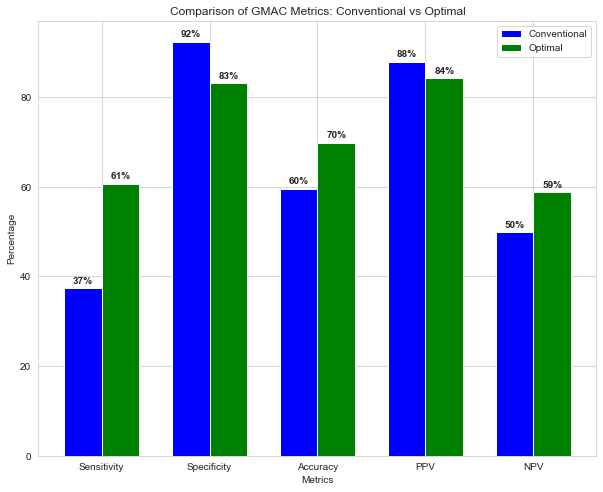

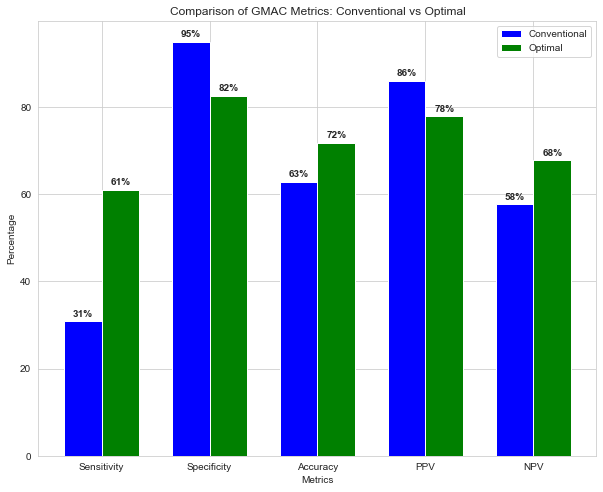

In [33]:
# Evaluating GMAC scores using the testing participant 
gmac_scores, eval_metrics_gmac = compute_evaluation_metrics_gmac(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                    testing_count_brond_ndh, testing_count_brond_dh,
                                    testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                    group_optimal_ac_threshold_ndh, group_optimal_ac_threshold_dh, group_optimal_fs_ndh, group_optimal_fs_dh)

plot_multiple_radar_plot(eval_metric_gm, figures_path, metric = 'GMAC')

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Ndh_AC.png'


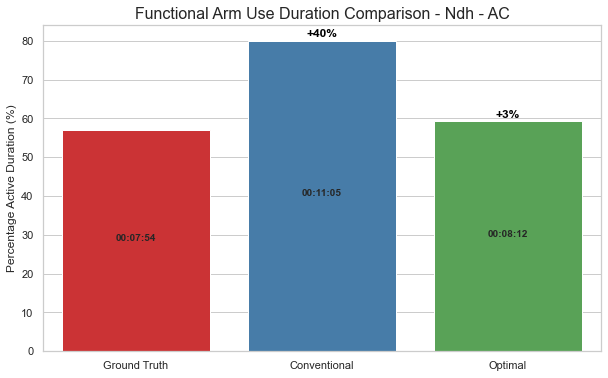

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Dh_AC.png'


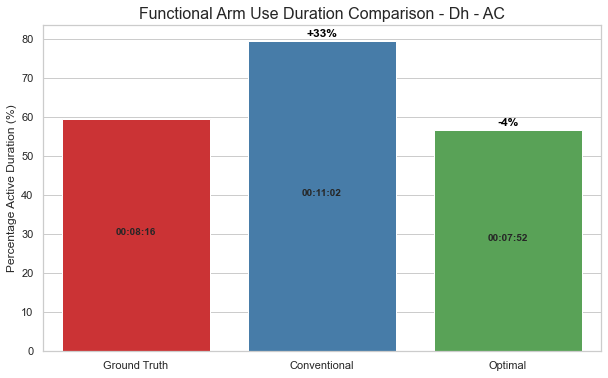

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Bil_AC.png'


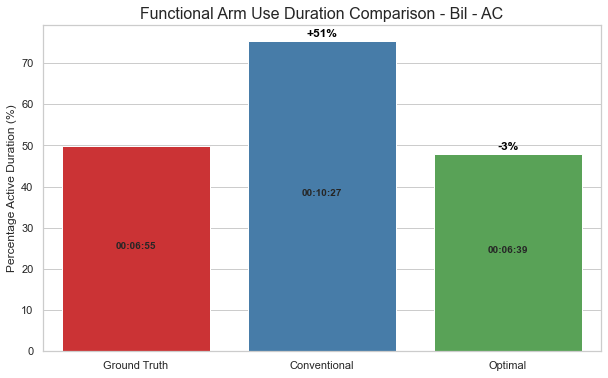

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Ndh_GM.png'


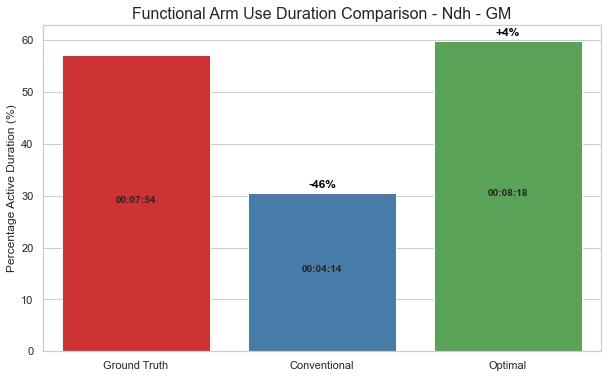

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Dh_GM.png'


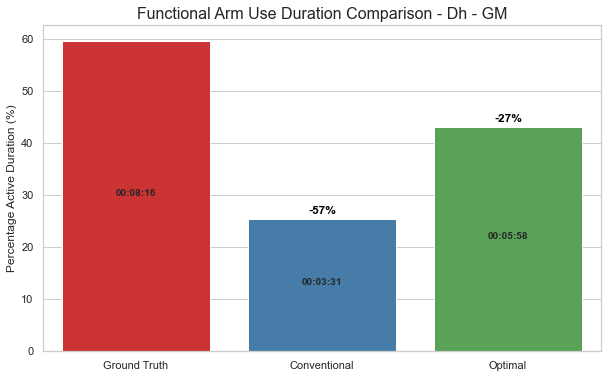

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Bil_GM.png'


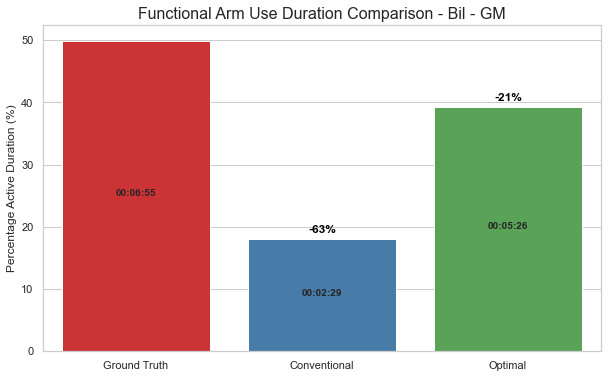

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Ndh_GMAC.png'


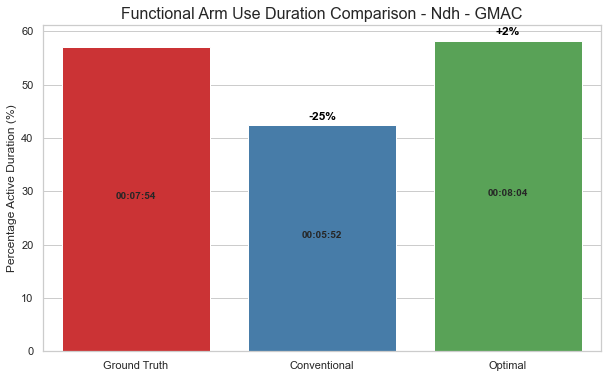

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Dh_GMAC.png'


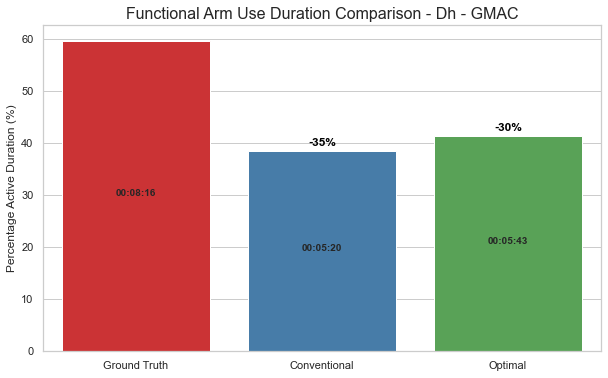

Figure saved as '../CreateStudy/group_figures\Functional_Arm_Use_Duration_Comparison_Bil_GMAC.png'


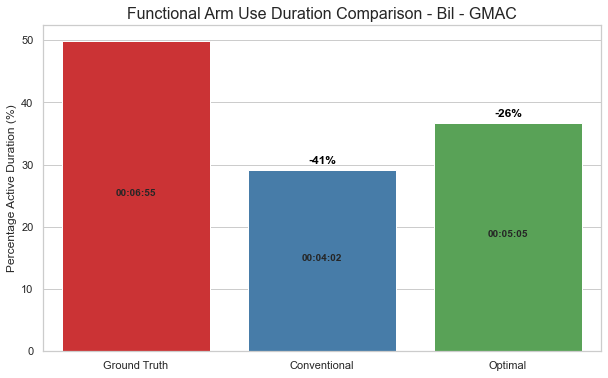

In [34]:
# Compute duration of functional arm use on testing dataset
# Get duration of arm use and corresponding % 
gmac_duration_arm_use = get_duration_functional_arm_use(gmac_scores, sampling_frequency = frequency_gmac)
ac_duration_arm_use = get_duration_functional_arm_use(ac_scores, sampling_frequency = frequency_gmac)
gm_duration_arm_use = get_duration_functional_arm_use(gm_scores, sampling_frequency = frequency_gm)
GT_50Hz_duration_arm_use = get_duration_functional_arm_use(testing_GT_mask_50Hz, sampling_frequency = frequency_GT)

# Plot duration of arm use comparaison 
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, ac_duration_arm_use, 'AC', save_path = figures_path)
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, gm_duration_arm_use, 'GM', save_path = figures_path)
compare_arm_use_duration_plot(GT_50Hz_duration_arm_use, gmac_duration_arm_use, 'GMAC', save_path = figures_path)